# Visual Tutorial: NER, Chunking, Token Classification

Why is there so much talk about Named Entity Recognition in a competition that requires us to detect and classify spans of texts? It looks like most of the top public notebooks used a NER approach to solve the Feedback Prize challenge. In this tutorial, I’d like to provide a beginner-friendly, visual explanation to this approach.

The first version of this tutorial will be rather short - if there are any topics you'd like me to expand on, please write that in the comments! It is also likely that I might have made some mistakes in the text below - I'll appreciate if you can let me know about those as well :) 

## Goal

Let’s assume we have a bunch of sentences and want to identify the people and the locations mentioned there. How would we go about such a goal? 

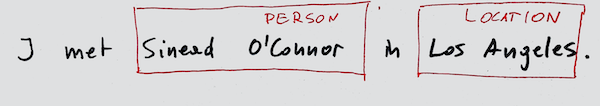

One possibility is to have dictionaries of people and locations, and for any n-gram (a sequence of n words) in our text look up if they exist in our dictionaries. Such a simple approach may not always work though and it may be hard for it to generalize to new, novel examples. For that reason, we may be better off building a machine learning solution. 

## Problem Formulation

So now that we want to build a machine learning model, we need to figure how to formulate the problem. The first challenge is input to the model - text. We need to convert that text into a set of numbers. There are many possible ways to do it: bag of words, TF-IDF etc. We know by now that transformers work pretty well in this competition, so let's focus on how to work with them. 

First, we need to split our input sequence into tokens. Tokens may be equal to words, but they may also be individual characters or word-pieces. Each transformer model comes with a vocabulary of such wordpieces, with a unique number associated with each wordpiece. The word *I* is has number *100* in our vocabulary, *met* is *1145* etc. Dividing a sequence into tokens is done by a tokenizer. We will not go in depth on that for now (ask your question in the comments if you'd like to learn more about this). 

Now that our sequence is divided into discrete tokens, we can achieve our goal of identifying people and locations by labeling each of the tokens. Let's go with 3 labels: O (for Other), PER (for person) and LOC (for location). Let's also convert our labels to numbers: O = 0, PER = 1, LOC = 2. Transformer models by convention require us to add some special tokens to our sequence, such as `<s>` and `</s>` below - we won't require predictions for them, so let's label them with -100 which is a special flag that tells our model that it shouldn't calculate loss for those tokens. 

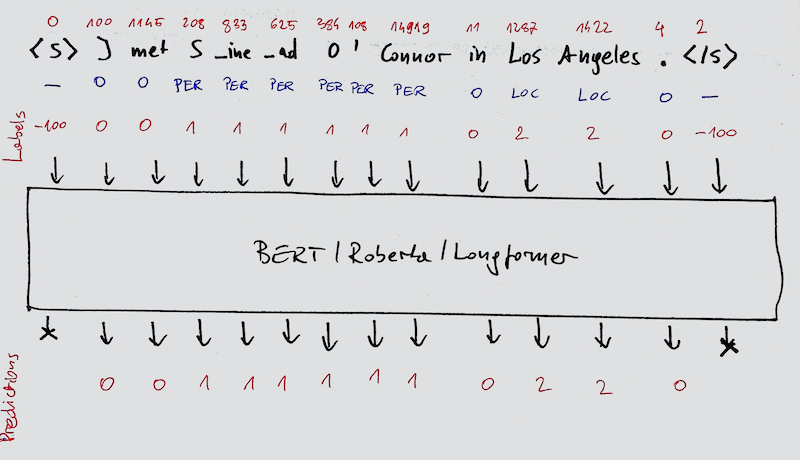

After the model is trained, it should output predictions for each token in a sequence corresponding to our class labels (O, PER, LOC). 

## Model Details

Let's dive a bit deeper - but not too deep - into our model. We already know that we can look up the input ids for each token in our sequence. Based on that input id, we can find the embedding vector corresponding to our token, which has been already trained on a pretext task such as masked language modelling. We don't want to pass single tokens into our model, but the entire sequence, so that the model can pick up a broader context. We also need to pass information about the position of the token in the sequence, because transformers don't get the word order in other ways. We combine the token and position embedding and pass that through a series of transformer blocks. 

We won't go through the details of what happens inside of the transformer blocks. If you'd like to dive deeper into this, [here](https://e2eml.school/transformers.html) is a good resource. After all the transformer magic, we're getting the output embedding (a vector) for each token in our sequence.

How do we go from the output embedding to the final prediction? First, we need to pass that embedding through token classification head. In the simplest form, it can be a linear layer that takes the output embedding as input, and outputs a float for each of predicted classes - in our case a vector of 3 floats. The raw output is usually called logits, but we want to convert it to something that looks more like a probability, i.e. set of numbers that sums up to 1. We do that by passing logits through a softmax layer. We can use this output during training to calculate our loss, and during inference to make our predictions. 

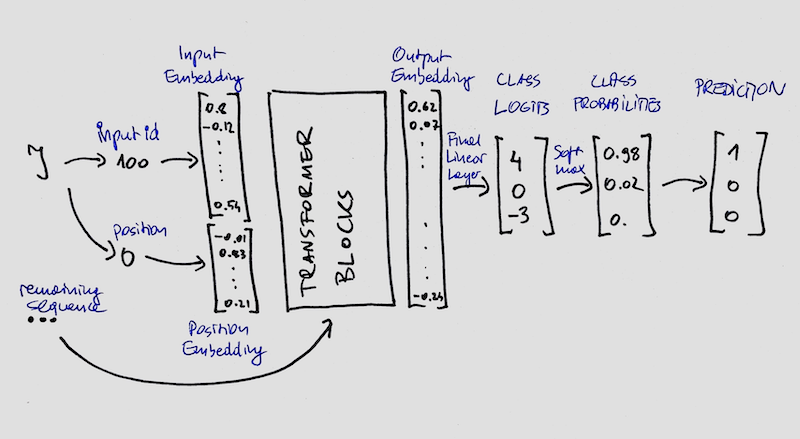

## Chunking and BIO format

When I first worked with NER, I was confused a bit by the different labeling schemes. In the examples above, we have one label per category (Person, Location, Other). I sticked to this simple approach until at some point I got a prediction of a person with a really long name: *Barack Obama Donald Trump Joe Biden*. This made me realize the problem here, which is that unless our individual entities are separated by other tokens, we won't be able to separate them. 

Here comes chunking, and the BIO format. BIO stands for Beginning, Inside, Outside. When we append B- and I- prefixes to our classes, we will be able to separate entities even if they are positioned next to each other in a text. 

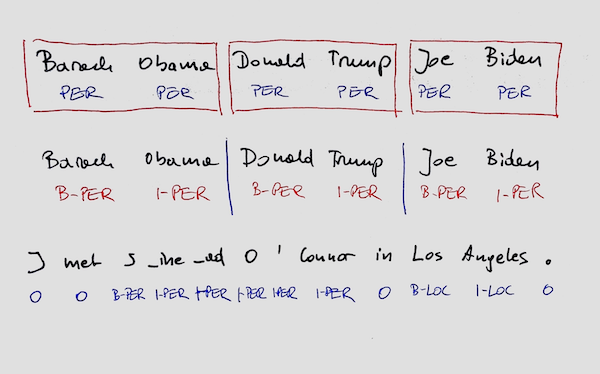

## Other Approaches

Token classification with BIO format is probably the most straightforward way to approach the Feedback Prize competition. There are some alternatives though:
- rather than classifying all tokens in a sequence, we can consider classifying only boundary tokens
- we can try sequence2sequence models such as T5
- we can process the data sequentially, first chunking it into spans, then classifying each span



**I'll appreciate comments with feedback or questions, I'd love to expand this tutorial in a direction that could be helpful. If you found it helps, I will appreciate an upvote :)**